In [1]:
import pandas as pd

# Create a DataFrame with the run results
data = {
    'Run': [1, 2, 3, 4],
    'Accuracy': [0.85, 0.75, 0.75, 0.85],
    'Precision': [0.71, 0.55, 0.60, 0.71],
    'Recall': [0.83, 1.00, 0.50, 0.83],
    'F1': [0.77, 0.71, 0.55, 0.77]
}

df = pd.DataFrame(data)
print(df)

   Run  Accuracy  Precision  Recall    F1
0    1      0.85       0.71    0.83  0.77
1    2      0.75       0.55    1.00  0.71
2    3      0.75       0.60    0.50  0.55
3    4      0.85       0.71    0.83  0.77


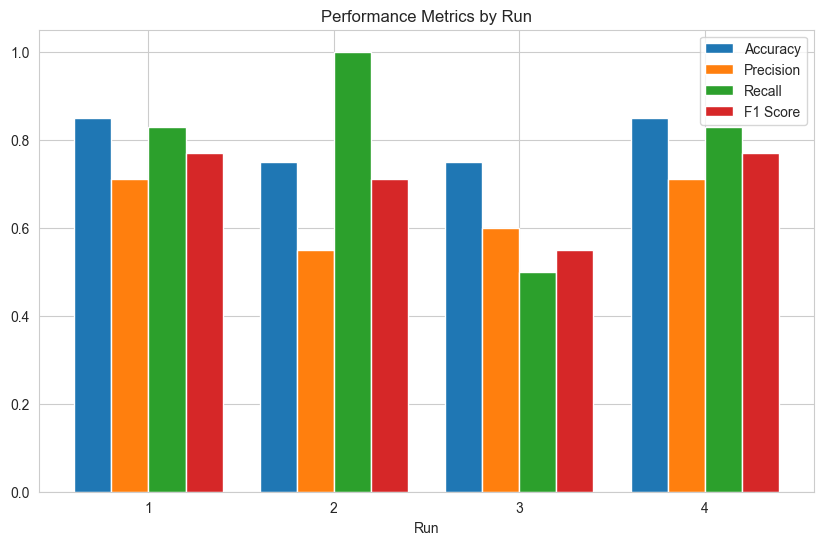

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bar width and positions
bar_width = 0.2
index = np.arange(len(df['Run']))

plt.figure(figsize=(10, 6))
plt.bar(index - 1.5*bar_width, df['Accuracy'], bar_width, label='Accuracy')
plt.bar(index - 0.5*bar_width, df['Precision'], bar_width, label='Precision')
plt.bar(index + 0.5*bar_width, df['Recall'], bar_width, label='Recall')
plt.bar(index + 1.5*bar_width, df['F1'], bar_width, label='F1 Score')

plt.xlabel('Run')
plt.xticks(index, df['Run'])
plt.title('Performance Metrics by Run')
plt.legend()
plt.show()

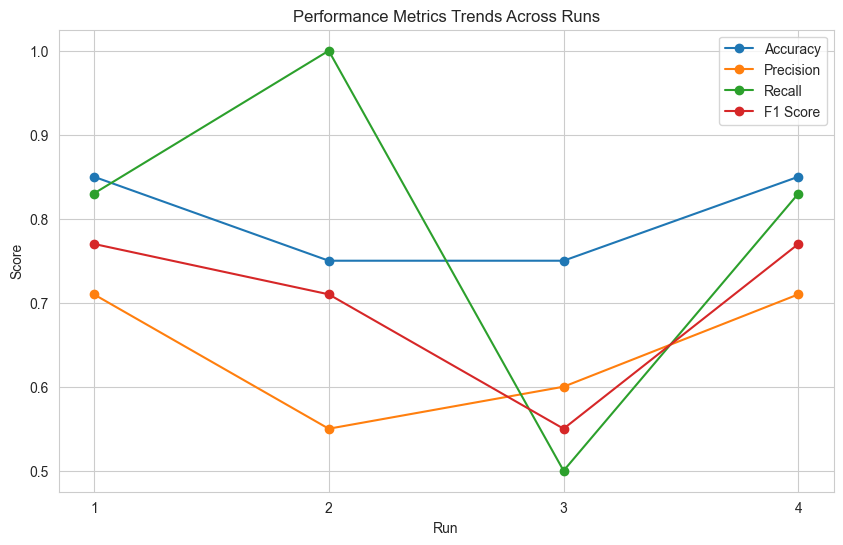

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Run'], df['Accuracy'], marker='o', label='Accuracy')
plt.plot(df['Run'], df['Precision'], marker='o', label='Precision')
plt.plot(df['Run'], df['Recall'], marker='o', label='Recall')
plt.plot(df['Run'], df['F1'], marker='o', label='F1 Score')

plt.xlabel('Run')
plt.ylabel('Score')
plt.title('Performance Metrics Trends Across Runs')
plt.xticks(df['Run'])
plt.legend()
plt.show()

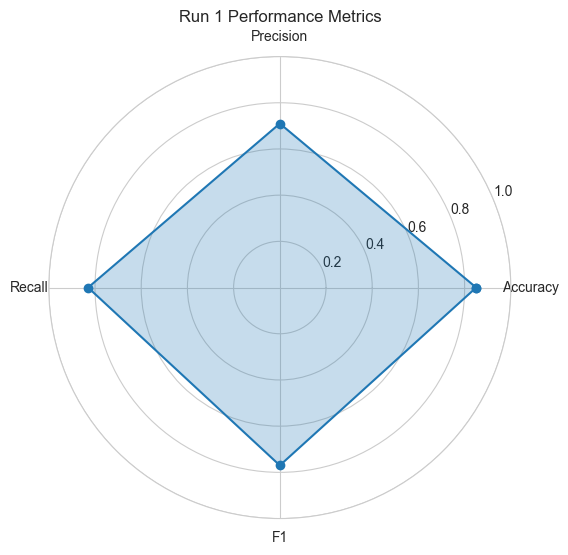

In [4]:
import numpy as np

def create_radar_chart(metrics, title):
    labels = list(metrics.keys())
    num_vars = len(labels)

    # Compute angle for each axis in the plot (in radians)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is made circular by appending a copy of the first value at the end.
    values = list(metrics.values())
    values += values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, marker='o')
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title)
    ax.set_ylim(0, 1)  # Assuming metric scores are between 0 and 1.
    plt.show()

# Example: Radar chart for Run 1
metrics_run1 = df.loc[df['Run'] == 1, ['Accuracy', 'Precision', 'Recall', 'F1']].to_dict('records')[0]
create_radar_chart(metrics_run1, "Run 1 Performance Metrics")

/var/folders/kj/jylhvyyd35n2mf4k9h8dqp600000gn/T/ipykernel_42236/1595911082.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Accuracy'], df['Precision'], df['Recall'], df['F1']], labels=['Accuracy', 'Precision', 'Recall', 'F1'])


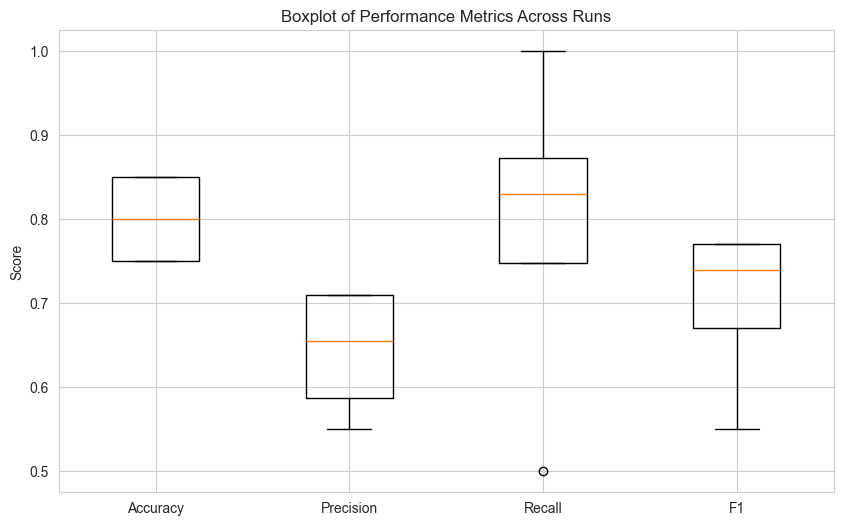

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Accuracy'], df['Precision'], df['Recall'], df['F1']], labels=['Accuracy', 'Precision', 'Recall', 'F1'])
plt.title("Boxplot of Performance Metrics Across Runs")
plt.ylabel("Score")
plt.show()

### Accuracy only

In [6]:
import pandas as pd

# Define the accuracy values for each run
data = {
    'Run': [1, 2, 3, 4],
    'Accuracy': [0.85, 0.75, 0.75, 0.85]
}

df = pd.DataFrame(data)
print(df)

   Run  Accuracy
0    1      0.85
1    2      0.75
2    3      0.75
3    4      0.85


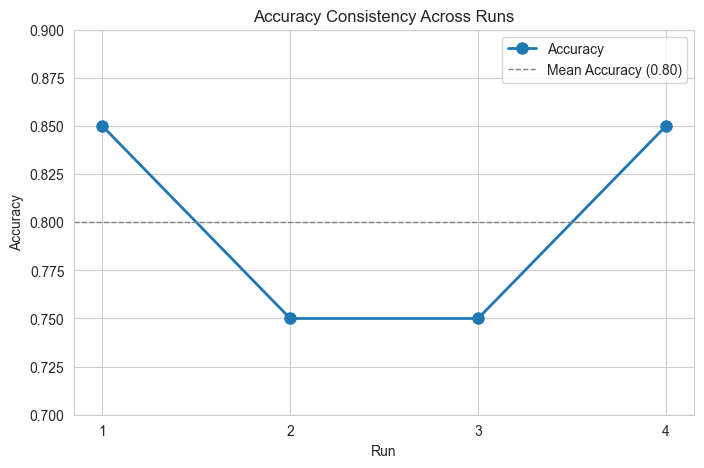

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df['Run'], df['Accuracy'], marker='o', linestyle='-', linewidth=2, markersize=8, label='Accuracy')
mean_acc = df['Accuracy'].mean()
plt.axhline(y=mean_acc, color='gray', linestyle='--', linewidth=1, label=f'Mean Accuracy ({mean_acc:.2f})')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Accuracy Consistency Across Runs')
plt.xticks(df['Run'])
plt.ylim(0.7, 0.9)
plt.legend()
plt.grid(True)
plt.show()

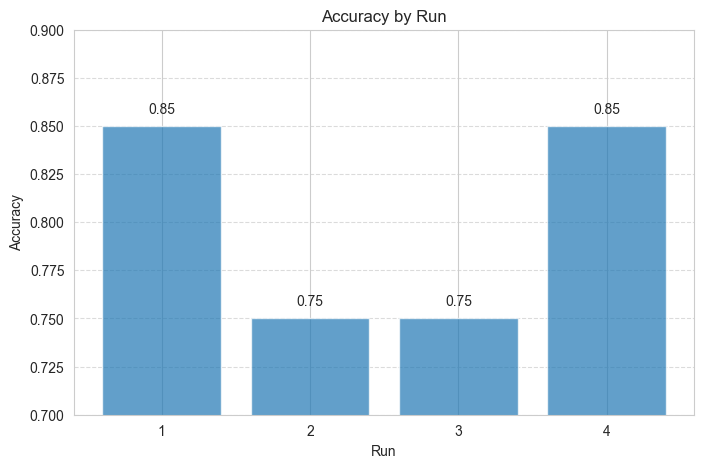

In [8]:
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Run'].astype(str), df['Accuracy'], alpha=0.7)
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Accuracy by Run')
plt.ylim(0.7, 0.9)

# Annotate each bar with its accuracy value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/kj/jylhvyyd35n2mf4k9h8dqp600000gn/T/ipykernel_42236/280395283.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Accuracy'], patch_artist=True, labels=['Accuracy'])


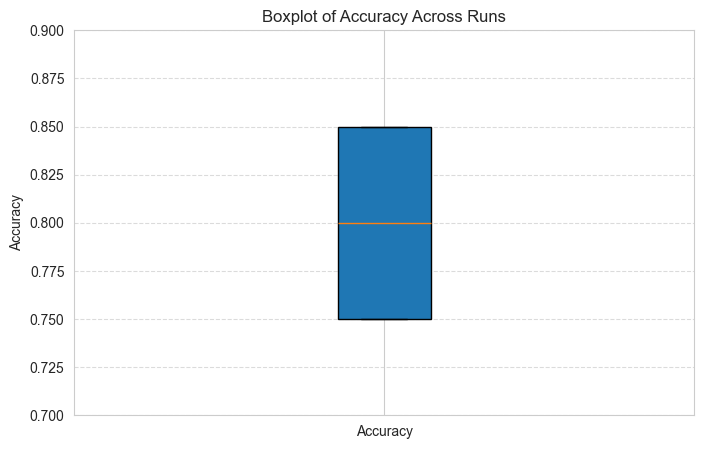

In [9]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Accuracy'], patch_artist=True, labels=['Accuracy'])
plt.title('Boxplot of Accuracy Across Runs')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

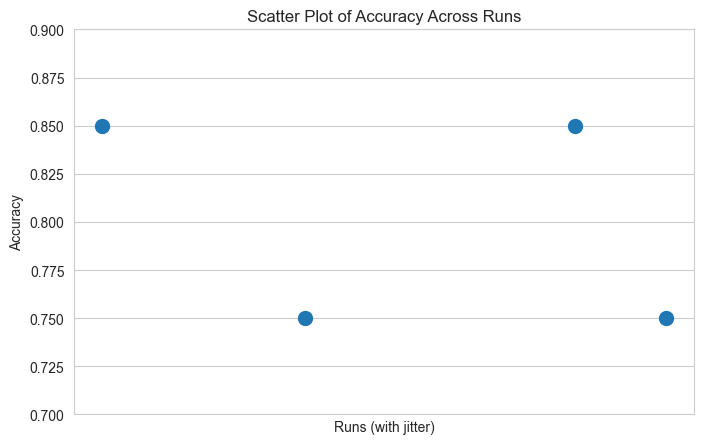

In [10]:
import numpy as np

plt.figure(figsize=(8, 5))
# Add slight jitter to the x-axis to avoid overlapping markers
x_jitter = np.random.normal(loc=1, scale=0.04, size=len(df['Accuracy']))
plt.scatter(x_jitter, df['Accuracy'], s=100)
plt.xlabel('Runs (with jitter)')
plt.ylabel('Accuracy')
plt.title('Scatter Plot of Accuracy Across Runs')
plt.ylim(0.7, 0.9)
plt.xticks([])  # Hide x-axis ticks as they are just for visual separation
plt.grid(True)
plt.show()

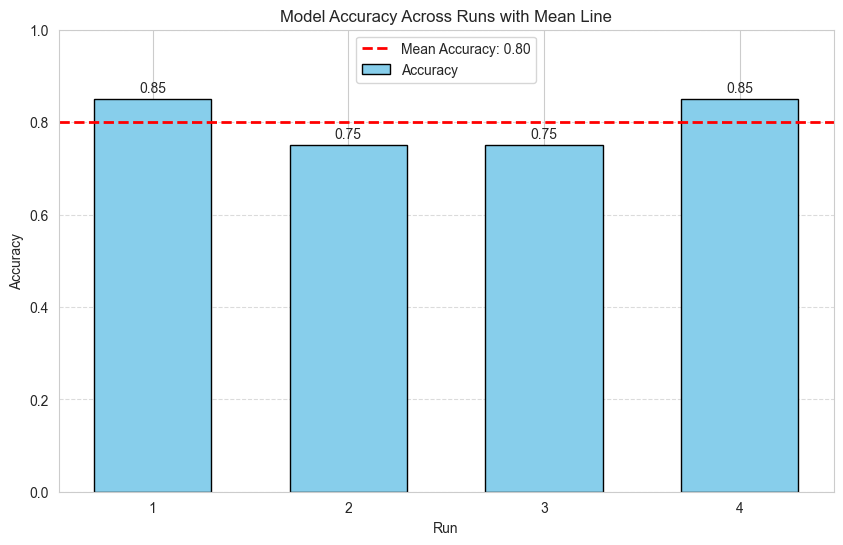

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with accuracy data
data = {
    'Run': [1, 2, 3, 4],
    'Accuracy': [0.85, 0.75, 0.75, 0.85]
}
df = pd.DataFrame(data)

# Calculate the mean accuracy
mean_accuracy = df['Accuracy'].mean()

# Create a bar chart with a mean accuracy line
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Run'].astype(str), df['Accuracy'], color='skyblue', edgecolor='black', width=0.6, label='Accuracy')

# Plot the mean accuracy as a dashed line
plt.axhline(y=mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean Accuracy: {mean_accuracy:.2f}')

# Annotate each bar with its accuracy value
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Set the y-axis scale to start at 0 and go to 1
plt.ylim(0, 1)

# Labeling and styling the chart
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Across Runs with Mean Line')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

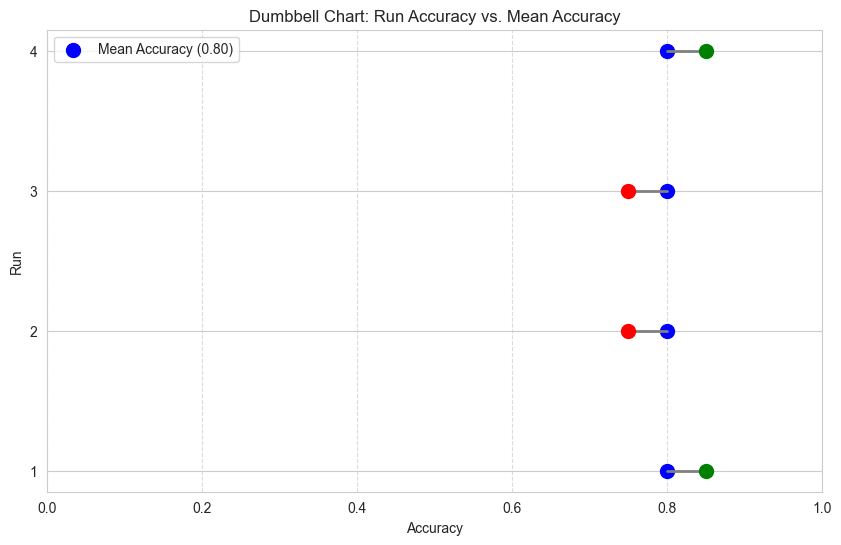

In [12]:
import matplotlib.pyplot as plt

# Calculate the mean accuracy
mean_accuracy = df['Accuracy'].mean()

plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    # Draw a horizontal line from mean to actual accuracy for each run
    plt.plot([mean_accuracy, row['Accuracy']], [row['Run'], row['Run']],
             color='gray', linewidth=2)
    # Mark the run's accuracy point with green if above mean, red if below
    plt.scatter(row['Accuracy'], row['Run'],
                color='green' if row['Accuracy'] >= mean_accuracy else 'red',
                s=100, zorder=3)

# Plot the mean accuracy as blue markers for each run position
plt.scatter([mean_accuracy]*len(df), df['Run'], color='blue', s=100, label=f'Mean Accuracy ({mean_accuracy:.2f})')

plt.xlabel('Accuracy')
plt.ylabel('Run')
plt.title('Dumbbell Chart: Run Accuracy vs. Mean Accuracy')
plt.xlim(0, 1)
plt.yticks(df['Run'])
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

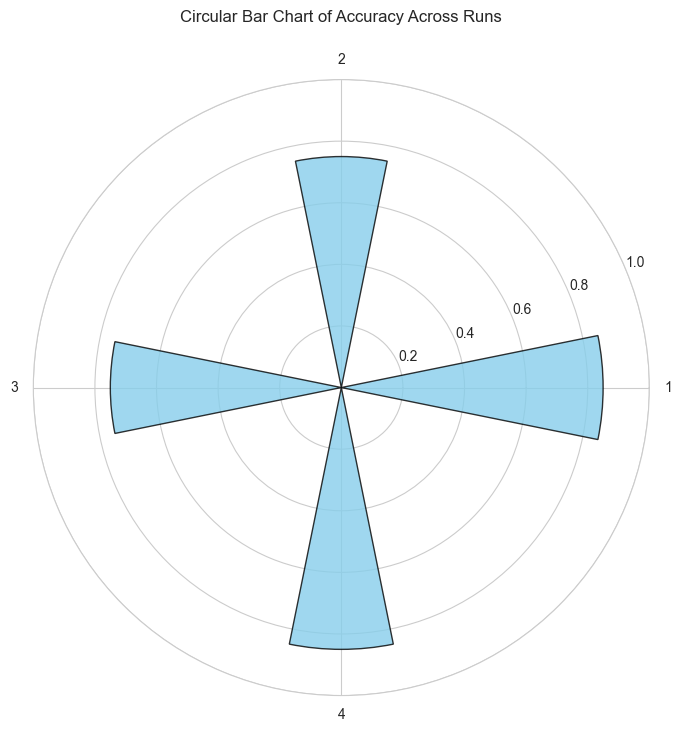

In [13]:
import numpy as np

# Number of runs
N = len(df)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
values = df['Accuracy']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
bars = ax.bar(angles, values, width=0.4, color='skyblue', edgecolor='black', alpha=0.8)

# Set run labels at the corresponding angles
ax.set_xticks(angles)
ax.set_xticklabels(df['Run'])
ax.set_ylim(0, 1)
ax.set_title("Circular Bar Chart of Accuracy Across Runs", y=1.08)
plt.show()

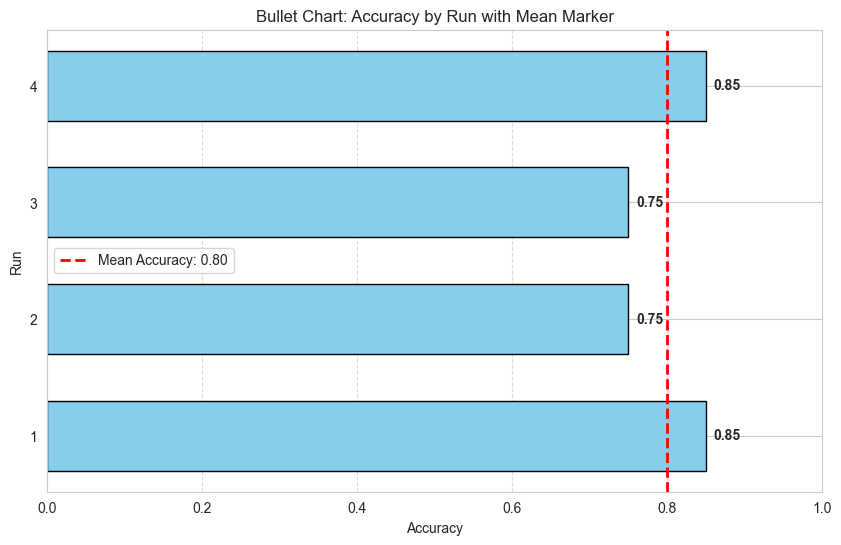

In [14]:
plt.figure(figsize=(10, 6))
# Horizontal bars for each run's accuracy
bars = plt.barh(df['Run'], df['Accuracy'], color='skyblue', edgecolor='black', height=0.6)

# Draw a vertical dashed line for the mean accuracy
plt.axvline(mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean Accuracy: {mean_accuracy:.2f}')

# Annotate each horizontal bar with its accuracy value
for index, row in df.iterrows():
    plt.text(row['Accuracy'] + 0.01, row['Run'], f'{row["Accuracy"]:.2f}',
             va='center', fontweight='bold')

plt.xlabel('Accuracy')
plt.ylabel('Run')
plt.title('Bullet Chart: Accuracy by Run with Mean Marker')
plt.xlim(0, 1)
plt.yticks(df['Run'])
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

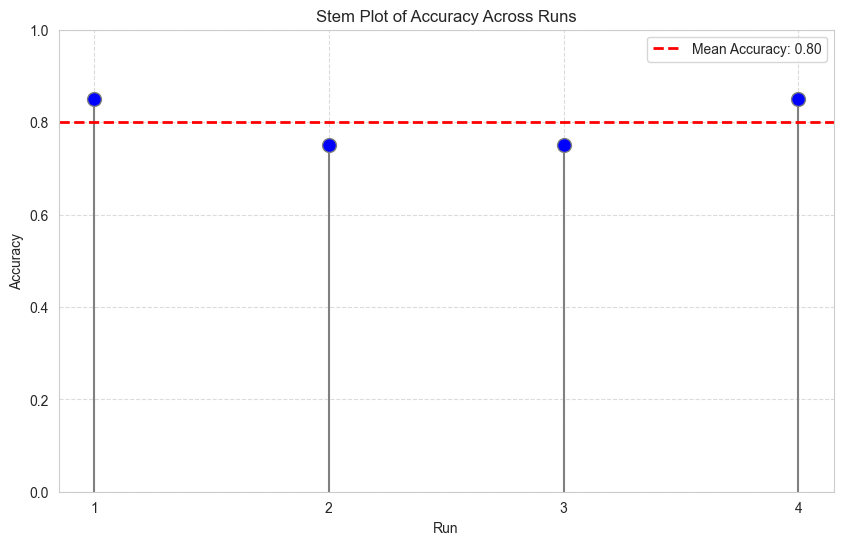

In [17]:
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(df['Run'], df['Accuracy'], linefmt='gray', markerfmt='o', basefmt=" ")
plt.setp(markerline, markersize=10, markerfacecolor='blue')

# Add a horizontal line for the mean accuracy
plt.axhline(mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Mean Accuracy: {mean_accuracy:.2f}')

plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Stem Plot of Accuracy Across Runs')
plt.xticks(df['Run'])
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Final plot

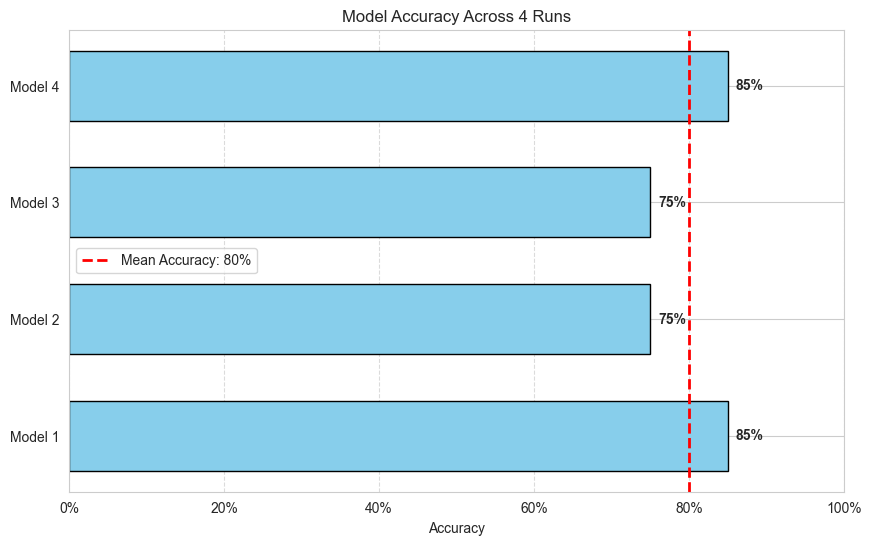

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the accuracy values (as decimals) for each model run
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Accuracy': [0.85, 0.75, 0.75, 0.85]
}
df = pd.DataFrame(data)

# Calculate the mean accuracy
mean_accuracy = df['Accuracy'].mean()

plt.figure(figsize=(10, 6))
# Create horizontal bars for each model's accuracy
bars = plt.barh(df['Model'], df['Accuracy'], color='skyblue', edgecolor='black', height=0.6)

# Plot a vertical dashed line at the mean accuracy
plt.axvline(mean_accuracy, color='red', linestyle='--', linewidth=2,
            label=f'Mean Accuracy: {mean_accuracy*100:.0f}%')

# Annotate each bar with its accuracy as a percentage
for index, row in df.iterrows():
    plt.text(row['Accuracy'] + 0.01, index, f'{row["Accuracy"]*100:.0f}%',
             va='center', fontweight='bold')

# Set the x-axis from 0 to 1 and format ticks as percentages
plt.xlim(0, 1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))

# Labeling and styling the chart
plt.xlabel('Accuracy')
plt.title('Model Accuracy Across 4 Runs')
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()